In [38]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew
import scipy

In [39]:
def read_file(filename):
    x = pickle._Unpickler(open(filename,'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

files = []
for n in range(12,16):
    s = 's'
    if n<10:
        s+='0'
    s += str(n)+'.dat'
    files.append(s)

labels = []
data   = []
for i in files:
    trial = read_file(i)
    labels.append(trial['labels'])
    data.append(trial['data'])
    
    
labels = np.array(labels)
labels = labels.flatten()
labels = labels.reshape(160, 4)


data = np.array(data)
data = data.flatten()
data = data.reshape(160, 40, 8064)

In [40]:
labels.shape

(160, 4)

In [41]:
data.shape

(160, 40, 8064)

#  One Hot Encoding

In [42]:
valenciaData = labels[:, :1]
arousalData  = labels[:,1:2]
medianValencia = np.median(valenciaData)
medianArousle  = np.median(arousalData)

In [43]:
def OneHotEncoding(valor,median):
    if valor >= median:
        return 1
    else:
        return 0

In [44]:
DFValencia = []
for i in valenciaData:
    DFValencia.append([OneHotEncoding(i[0],medianValencia)])
    
DFArousal = []
for i in arousalData:
    DFArousal.append([OneHotEncoding(i[0],medianArousle)])

DFValencia = pd.DataFrame(data =DFValencia,columns=['Valence'])
DFArousal = pd.DataFrame(data =DFArousal,columns=['Arousal'])

In [45]:
#ETIQUETA VALENCIA Y ETIQUETA AROUSEL
DFValenciaArrousel = pd.concat([DFValencia,DFArousal],axis=1)
DFValenciaArrousel

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


# Considerar únicamente 32 de los 40 canales 

In [46]:
egg_data = []
for i in range (len(data)):
    for j in range (32):
        egg_data.append(data[i,j])
egg_data = np.reshape(egg_data, (len(data),32,len(data[0,0]))) #(160, 32, 8064)
print(egg_data.shape)

(160, 32, 8064)


# Extraer características de la data (media, varianza, mediana, curtosis,skewness)

In [47]:
egg_data.shape

(160, 32, 8064)

In [48]:
media     =  np.mean(egg_data, axis=2)
varianza  =  np.var(egg_data, axis=2) 
mediana   =  np.median(egg_data, axis=2)
curtosis  =  scipy.stats.kurtosis(egg_data, axis=2)
asimetria =  scipy.stats.skew(egg_data, axis=2)
totalData =  np.concatenate((media, varianza, mediana),axis=1) 
totalData =  pd.DataFrame(totalData)
totalData

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.371836,0.003666,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.000851,0.308096,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.222298,0.159388,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.218251,0.164955,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.048290,0.106923,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.151505,-0.073370,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.531636,-0.578895,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.178256,-0.207073,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.286763,0.352991,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031


In [49]:
#UNIMOS CON LA ETIQUETA VALENCIA Y ETIQUETA AROUSEL
totalData = pd.concat([totalData,DFValenciaArrousel],axis=1)
totalData

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,Valence,Arousal
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193,1,1
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996,1,1
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206,1,1
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657,1,1
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694,0,0
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439,0,0
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023,0,1
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031,0,0


In [50]:
# se muestran datos solo del tipo especificado (solo consulta,no se modifican)
totalData.select_dtypes(include=['float64', 'int']).describe()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,Valence,Arousal
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.00000
mean,-0.005890,-0.007621,-0.023951,0.005265,-0.004126,-0.008070,-0.006071,0.010823,-0.004460,-0.023336,...,0.026879,0.181299,0.011617,0.035476,-0.030795,-0.022655,-0.056339,-0.043344,0.50000,0.50000
std,0.176538,0.142382,0.604702,0.200229,0.089254,0.197865,0.203268,0.358762,0.129518,0.419129,...,0.264212,0.417942,0.221342,0.529640,0.420205,0.306941,0.374107,0.194368,0.50157,0.50157
min,-0.621764,-0.723853,-3.986174,-0.924433,-0.283151,-0.898837,-1.015611,-1.349137,-0.548055,-2.493877,...,-1.046234,-1.717859,-0.818060,-2.225070,-2.451904,-1.193224,-2.405440,-0.733827,0.00000,0.00000
25%,-0.093051,-0.057948,-0.131375,-0.075273,-0.045013,-0.050932,-0.058586,-0.148350,-0.051331,-0.094773,...,-0.050956,-0.016872,-0.091782,-0.101692,-0.140289,-0.173017,-0.193369,-0.133471,0.00000,0.00000
50%,0.002611,0.011808,-0.003507,0.005694,-0.004228,0.006277,-0.010517,-0.000244,0.002014,0.005602,...,-0.006177,0.132965,-0.003030,0.036325,-0.019602,-0.011124,-0.061915,-0.060328,0.50000,0.50000
75%,0.062163,0.057256,0.093548,0.068353,0.042596,0.062705,0.066668,0.157693,0.039107,0.089031,...,0.073364,0.274771,0.111038,0.200658,0.139389,0.158389,0.100469,0.050309,1.00000,1.00000
max,0.649158,0.536222,3.282143,0.717336,0.262285,0.848941,0.760755,1.583725,0.665547,2.040521,...,1.279200,1.850286,0.758814,2.257056,1.918795,1.084685,1.737048,0.721623,1.00000,1.00000


<AxesSubplot:>

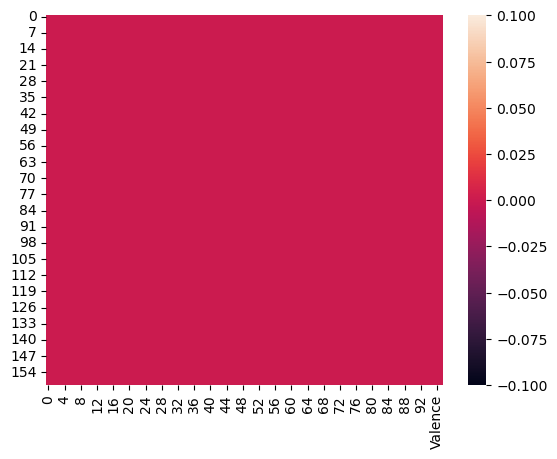

In [51]:
totalData.isnull()
sns.heatmap(totalData.isna())

In [52]:
totalData

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,Valence,Arousal
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193,1,1
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996,1,1
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206,1,1
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657,1,1
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694,0,0
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439,0,0
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023,0,1
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031,0,0


# REGRESION LINEAL

# Division de datos

In [53]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale

x = totalData.iloc[:, :-2]
y = totalData[['Valence','Arousal']]

In [54]:
x

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.371836,0.003666,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.000851,0.308096,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.222298,0.159388,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.218251,0.164955,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.048290,0.106923,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.151505,-0.073370,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.531636,-0.578895,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.178256,-0.207073,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.286763,0.352991,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031


In [55]:
y

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


In [56]:
#y = casas.iloc[:, -1:]# columna / variable objetivo
y = totalData[['Valence','Arousal']]

y

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


In [57]:
# entremiento 70 - 30%.. aleatoreamente
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

# CREACION DEL MODELO

In [58]:
from sklearn.preprocessing import minmax_scale

In [59]:
# Transformaciones para las variables numéricas
# PROBAR con y sin esto transformación
x_train = minmax_scale(x_train)
y_train = minmax_scale(y_train)

In [60]:
lrm = LinearRegression() # algoritmo a utilizar
lrm.fit(x_train,y_train) #

LinearRegression()

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [62]:
y_pred = lrm.predict(x_test)
y_pred

array([[-9.80348200e+13,  1.10390140e+14],
       [-1.00175851e+14,  1.12801005e+14],
       [-1.06024929e+14,  1.19387242e+14],
       [-9.87892038e+13,  1.11239599e+14],
       [-9.47277602e+13,  1.06666291e+14],
       [-1.02443893e+14,  1.15354888e+14],
       [-8.43791752e+13,  9.50134749e+13],
       [-9.84454787e+13,  1.10852554e+14],
       [-9.59524880e+13,  1.08045372e+14],
       [-9.07722934e+13,  1.02212318e+14],
       [-1.00721269e+14,  1.13415162e+14],
       [-9.94688081e+13,  1.12004853e+14],
       [-9.52354583e+13,  1.07237975e+14],
       [-1.01974900e+14,  1.14826787e+14],
       [-1.07734729e+14,  1.21312528e+14],
       [-1.01634567e+14,  1.14443563e+14],
       [-1.02249096e+14,  1.15135541e+14],
       [-9.90287218e+13,  1.11509303e+14],
       [-9.62205048e+13,  1.08347166e+14],
       [-1.02859459e+14,  1.15822828e+14],
       [-1.02409072e+14,  1.15315679e+14],
       [-9.98439873e+13,  1.12427316e+14],
       [-1.00438880e+14,  1.13097184e+14],
       [-9.

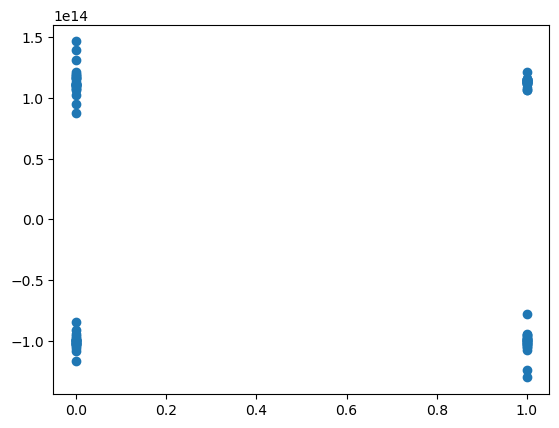

In [63]:
plt.scatter(y_test, y_pred)

C:\Users\gabic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

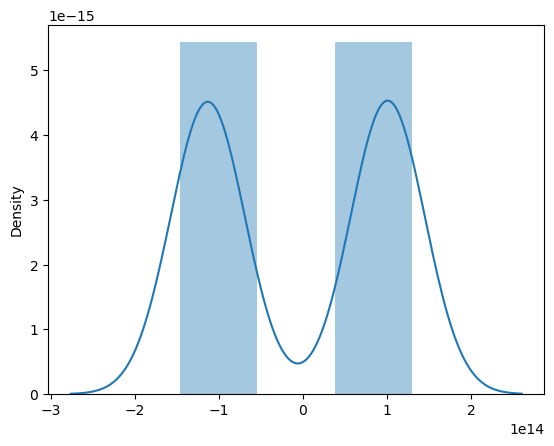

In [64]:
sns.distplot(y_test - y_pred)

In [65]:
# calculamos el coeficiente de determinación R2
"""El rango de R2 está entre 0 y 1, siendo 1 lo mejor."""
print("Coeficiente de determinación R^2:", lrm.score(x_train,y_train))

Coeficiente de determinación R^2: 0.8138257963006355


In [66]:
print("Coeficiente de determinación R^2:", lrm.score(x_test,y_pred))

Coeficiente de determinación R^2: 1.0


In [67]:
# MAE (Mean absolute error) - Error medio absoluto
metrics.mean_absolute_error(y_test,y_pred) # paso los valores reales y predicciones
# mientras menor es el valor mejor es el modelo

107127327232494.34

In [68]:
# MSE (Error cuadrático medio)
metrics.mean_squared_error(y_test,y_pred)

1.158623621434461e+28

In [69]:
# RMSE (Raíz Cuadrada del MSE)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

107639380406729.44

In [70]:
# Se crea un dataframe con las predicciones y el valor real
#from math import *
#df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : y_pred, 'dif' : abs((y_test-y_pred))})
#df_predicciones.head()

# NORMALIZACION DE DATOS

In [71]:
from sklearn.preprocessing import StandardScaler

# Crea un objeto StandardScaler para normalizar los datos
scaler = StandardScaler()
# Ajusta el objeto scaler al conjunto de datos de entrenamiento
scaler.fit(x_train)
# Normaliza los datos de entrenamiento y de prueba utilizando el objeto scaler
x_train = scaler.transform(x_train)
# Ajusta el objeto scaler al conjunto de datos de entrenamiento
scaler.fit(x_test)
# Normaliza los datos de entrenamiento y de prueba utilizando el objeto scaler
x_test = scaler.transform(x_test)

In [72]:
# Transformaciones para las variables numéricas
# PROBAR con y sin esto transformación
x_train = minmax_scale(x_train)
y_train = minmax_scale(y_train)

In [73]:
lrm = LinearRegression() # algoritmo a utilizar
lrm.fit(x_train,y_train) #

LinearRegression()

In [74]:
y_pred = lrm.predict(x_test)
y_pred

array([[2.00233000e+13, 3.84983882e+13],
       [1.96922951e+13, 3.78619719e+13],
       [2.26331435e+13, 4.35162808e+13],
       [1.99124320e+13, 3.82852247e+13],
       [1.59023683e+13, 3.05751574e+13],
       [2.07952412e+13, 3.99825837e+13],
       [1.08896510e+13, 2.09373086e+13],
       [1.93945734e+13, 3.72895486e+13],
       [1.77781712e+13, 3.41817252e+13],
       [1.79517275e+13, 3.45154183e+13],
       [1.91466118e+13, 3.68127979e+13],
       [2.02285149e+13, 3.88929507e+13],
       [1.81182223e+13, 3.48355345e+13],
       [2.06618504e+13, 3.97261161e+13],
       [2.78494745e+13, 5.35456135e+13],
       [2.06052507e+13, 3.96172929e+13],
       [2.25787696e+13, 4.34117373e+13],
       [1.97717895e+13, 3.80148142e+13],
       [1.79403990e+13, 3.44936372e+13],
       [2.20759786e+13, 4.24450313e+13],
       [2.03810066e+13, 3.91861434e+13],
       [2.06386314e+13, 3.96814734e+13],
       [2.11505849e+13, 4.06657959e+13],
       [1.86062956e+13, 3.57739429e+13],
       [2.000348

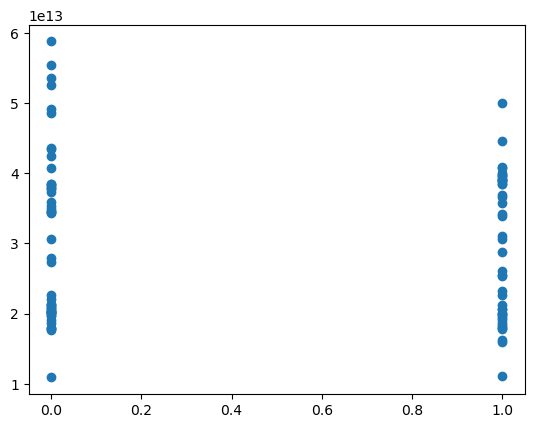

In [75]:
plt.scatter(y_test, y_pred)

C:\Users\gabic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

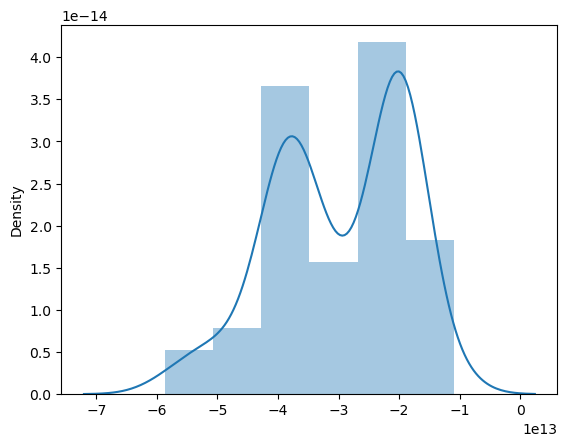

In [76]:
sns.distplot(y_test - y_pred)

In [77]:
# calculamos el coeficiente de determinación R2
"""El rango de R2 está entre 0 y 1, siendo 1 lo mejor."""
print("Coeficiente de determinación R^2:", lrm.score(x_train,y_train))

Coeficiente de determinación R^2: 0.8168056314111034


In [78]:
print("Coeficiente de determinación R^2:", lrm.score(x_test,y_pred))

Coeficiente de determinación R^2: 1.0


In [79]:
# MAE (Mean absolute error) - Error medio absoluto
metrics.mean_absolute_error(y_test,y_pred) # paso los valores reales y predicciones
# mientras menor es el valor mejor es el modelo

29870664674614.29

In [80]:
# MSE (Error cuadrático medio)
metrics.mean_squared_error(y_test,y_pred)

1.0133457633538437e+27

In [81]:
# RMSE (Raíz Cuadrada del MSE)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

31833092268170.3

In [82]:
# Se crea un dataframe con las predicciones y el valor real
from math import *
df_predicciones = pd.DataFrame({'arousel' : y_test, 'prediccion' : y_pred, 'dif' : abs((y_test-y_pred))})
df_predicciones.head()

ValueError: Per-column arrays must each be 1-dimensional